In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [6]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [7]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [8]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [8]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x7fa9899563a0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Damage', 'A.4_Dike Investmen

In [9]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:45<00:00,  4.38it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [10]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,30,84.446399,10.0,0.514538,57.909281,10.0,0.310185,264.155295,1.0,0.369734,...,9,3,4,10,10,6,2,4,0,dikesnet
1,87,146.356417,10.0,0.372703,317.271898,1.5,0.947711,103.452962,1.5,0.550417,...,9,3,4,10,10,6,2,5,0,dikesnet
2,65,223.772451,1.5,0.593853,236.961824,10.0,0.930418,128.730904,10.0,0.638861,...,9,3,4,10,10,6,2,6,0,dikesnet
3,81,134.122484,1.5,0.531784,186.743438,1.5,0.626655,332.851215,1.5,0.152793,...,9,3,4,10,10,6,2,7,0,dikesnet
4,35,164.534241,1.5,0.861247,85.560667,1.0,0.827212,164.360522,1.0,0.695904,...,9,3,4,10,10,6,2,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,120,210.710812,1.0,0.832402,281.001918,1.0,0.606196,195.489204,1.0,0.650065,...,5,6,7,0,1,4,1,49,3,dikesnet
196,70,120.851679,1.0,0.708123,339.002975,1.5,0.036159,40.974263,1.0,0.613868,...,5,6,7,0,1,4,1,50,3,dikesnet
197,123,181.134523,1.0,0.819017,166.347552,1.5,0.485028,325.106185,1.5,0.805045,...,5,6,7,0,1,4,1,51,3,dikesnet
198,2,144.236729,1.5,0.682688,128.322456,1.0,0.278599,99.807458,10.0,0.115626,...,5,6,7,0,1,4,1,52,3,dikesnet


In [11]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.449562e+08,0.0,2.081644e+08,0.000847,1.249149e+08,0.00000,5.944456e+07,0.000000,1.404200e+08,0.000000,1.000800e+09,470.626153
1,1.449562e+08,0.0,2.009914e+08,0.000242,1.249149e+08,0.00000,5.944456e+07,0.000000,1.595549e+08,0.001566,1.000800e+09,1188.991533
2,1.449562e+08,0.0,1.982604e+08,0.000000,1.249149e+08,0.00000,5.944456e+07,0.000000,1.404200e+08,0.000000,1.000800e+09,0.000000
3,1.449562e+08,0.0,2.376081e+08,0.005198,1.249149e+08,0.00000,5.944456e+07,0.000000,1.404200e+08,0.000000,1.000800e+09,3107.452957
4,1.449562e+08,0.0,1.982604e+08,0.000000,1.288139e+08,0.00082,5.944456e+07,0.000000,1.911794e+08,0.005186,1.000800e+09,4020.589346
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.045780e+08,0.0,3.000417e+08,0.000000,1.218614e+08,0.00000,3.781059e+07,0.000000,1.163985e+08,0.000000,1.251600e+09,0.000000
196,2.045780e+08,0.0,3.000417e+08,0.000000,1.218614e+08,0.00000,3.902108e+07,0.000868,1.163985e+08,0.000000,1.251600e+09,0.000000
197,2.045780e+08,0.0,3.000417e+08,0.000000,1.218614e+08,0.00000,3.781059e+07,0.000000,1.163985e+08,0.000000,1.251600e+09,0.000000
198,2.045780e+08,0.0,3.000417e+08,0.000000,1.218614e+08,0.00000,3.781059e+07,0.000000,1.163985e+08,0.000000,1.251600e+09,0.000000


In [11]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [ ]:
# Custom policies

# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


custom_policies = [
    Policy(
        "0 RfR sensitivity test",
        **dict(
            get_do_nothing_dict(),
            **{f"0_RfR 0": 1}
        )
    ),
    Policy(
        f"{x} RfR",
        **dict(
            get_do_nothing_dict(),
            **{f"{x}_RfR 0": 1}
        )
    ) for x in range(0,5)
]

In [12]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [02:00<00:00,  2.50it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
experiments, outcomes = results

In [14]:
# only works because we have scalar outcomes
outcome_df = pd.DataFrame(outcomes)
experiments_df = pd.DataFrame(experiments)

In [16]:
outcome_df["policy"] = experiments_df["policy"]

/var/folders/gp/zwnx1q2x7p9fcz4l931qnclc0000gn/T/ipykernel_21568/3747287958.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_df.groupby(by="policy")["A.1 Total Costs"].mean().plot()


<Axes: xlabel='policy'>

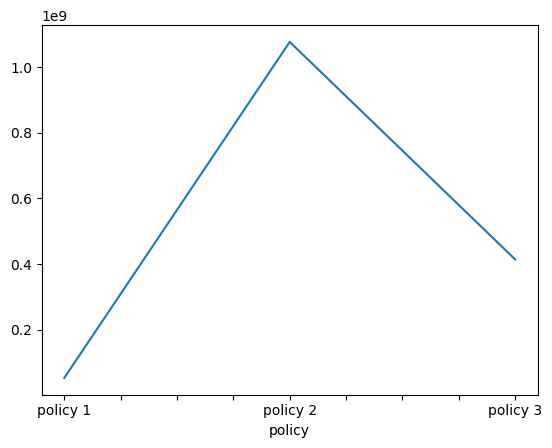

In [19]:
# outcome_df["A.1 Total Costs"]
# outcome_df[outcome_df["policy"] == "policy 1"].mean()
outcome_df.groupby(by="policy")["A.1 Total Costs"].mean().plot()
# experiments_df